Carvana provides financing to our customers to help them purchase their Carvana vehicle. Carvana needs to decide what APR's (interest rate) we'd like to offer customers on those loans. The rate we offer affects the profitability of the loans we originate, as well as the likelihood that the customer purchases a vehicle from us.

To help us optimize our rate offering, we run randomized experimentation so that we can measure how things change as we adjust the rates we offer.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# read the csv file
df = pd.read_csv('APR_Strategy_w._Randomized_Experimentation_CSV.csv')
# convert to data frame
df = pd.DataFrame(df)
# delete unnecessary coulmns
df = df.drop(df.columns[[7, 8, 9, 10]], axis=1) 

#view data
df

,app_id,fico,apr_test_group,apr,converted to sale,vehicle margin,finance margin
0,1,700,control,4.0%,False,NaN,NaN
1,2,700,test,3.0%,False,NaN,NaN
2,3,700,test,3.0%,False,NaN,NaN
3,4,700,control,4.0%,False,NaN,NaN
4,5,700,control,4.0%,True,1000.0,600.0
...,...,...,...,...,...,...,...
19995,19996,600,test,4.4%,True,1000.0,400.0
19996,19997,600,test,4.4%,False,NaN,NaN
19997,19998,600,test,4.4%,False,NaN,NaN
19998,19999,600,control,5.4%,False,NaN,NaN


Lets have a look on datatype of the dataset. 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
app_id               20000 non-null int64
fico                 20000 non-null int64
apr_test_group       20000 non-null object
apr                  20000 non-null object
converted to sale    20000 non-null bool
vehicle margin       5021 non-null float64
finance margin       5021 non-null float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 957.2+ KB


APR datatype showing object(type), to perform numerical operation we convert it to float.

In [3]:
# convert apr type object to float
df['apr'] = list(map(lambda x: x[:-1], df['apr'].values))
df['apr'] = [float(x) for x in df['apr'].values]

**Question 1. Carvana pricing: what’s the current APR pricing strategy for the different FICO buckets? How is the randomized test structured? How do APR's vary by test group?**

To do this, we create one subset of dataset which having fico, apr and apr_test_group and call that dataset as df1.

In [4]:
df1 = df[['fico', 'apr', 'apr_test_group']]

Fico has 2 bucket category such as 600 and 700. To know the relationship between fico and apr, apply filter on fico. Then apply describe function, that will show the summary statistics of the variables. 

In [5]:
df1[(df1['fico'] == 600)][['apr']].describe()

,apr
count,10001.000000
mean,4.909449
std,0.499936
min,4.400000
25%,4.400000
50%,5.400000
75%,5.400000
max,5.400000


In 600 Fico bucket APR(interest rate) minimum value is 4.4% and maximum value is 5.4%.

In [6]:
df1[df1['fico'] == 700][['apr']].describe()

,apr
count,9999.000000
mean,3.492649
std,0.499971
min,3.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,4.000000


Similarly, for 700 Fico bucket APR minimum interest rate is 3% and maximum rate is 4%.

Test group has 2 values i.e test and control. And the customer assigned to this group randomly.

In [7]:
df1['apr_test_group'].unique()

array(['control', 'test'], dtype=object)

Now we will look in to how APR varies by test group. Below function return the APR value, but we need to pass the parameter like Fico bucket and  test group.

In [8]:
def arp_vs_testGroup(fico, test_group):
    
    return df1[(df1['fico'] == int(fico)) & (df1['apr_test_group'] == test_group)][['apr']].apply(lambda x: x.unique())


In [9]:
# bucket 600 with test group
arp_vs_testGroup(600, 'test')

,apr
0,4.4


In [10]:
# bucket 700 with test group
arp_vs_testGroup(700, 'test')

,apr
0,3.0


In [11]:
# bucket 600 with control group
arp_vs_testGroup(600, 'control')

,apr
0,5.4


In [12]:
# bucket 700 with control group
arp_vs_testGroup(700, 'control')

,apr
0,4.0


Above cases we see, when bucket is 600 and group is test APR is 4.4% <br>
When bucket is 700 and group is test APR is 3% (lower) <br>
When bucket is 600 and group is control APR is 5.4% (higher) <br>
When bucket is 700 and group is control APR is 4% <br>

So basically we can say, when bucket is 700 and user is under test group APR is low and if the bucket is 600 and user is under control group APR is high. 

**Question 2. Customer conversion rate: in general, how many applications is Carvana able to convert to a sale? How does that vary by FICO? Using the APR test group data, how does the APR affect conversion?**

In general, 5021 applications is Carvana able to convert to a sale.

In [13]:
df[df['converted to sale']==True][['app_id']].count()

app_id    5021
dtype: int64

In [14]:
df[df['converted to sale']==True][['fico', 'app_id']].groupby('fico').count()

,app_id
fico,
600,2216
700,2805


When Fico = 700, there are 2805 sales and Fico = 2216, there are 2216 sales. This may be due to APR. When the bucket is 700, APR is low and Carvana is able to do more sales.

In [15]:
df[df['converted to sale']==True][['app_id', 'apr_test_group', 'apr']].groupby(['apr_test_group', 'apr']).count()

app_id
apr_test_group apr        
control        4.0    1300
               5.4    1044
test           3.0    1505
               4.4    1172

We see, there is more sales in the test group than the control group. Under the test group, low apr shows the highest number of sales.

Using APR and Sales value create another dataset and see how both are co-relate with each other.

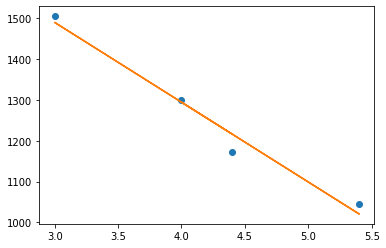

In [16]:
# empty dataset
df2 = pd.DataFrame()
# add apr
df2['apr'] = [4, 5.4, 3, 4.4]
# add number of sales
df2['sales_count'] = [1300, 1044, 1505, 1172]
# plot the graph
plt.plot(df2['apr'], df2['sales_count'], 'o')
m, b = np.polyfit(df2['apr'], df2['sales_count'], 1)
plt.plot(df2['apr'], m*df2['apr'] + b)
plt.show()

The above plot shows the linear relationship between APR and Sales. APR and Sales are negatively co-relate, which means if APR increases then sales decreases and vice versa.

Create linear regression function, where user pass APR it will display the predicted Sales count.

In [17]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

b_0, b_1 = estimate_coef(df2['apr'], df2['sales_count'])

def prediction(apr):
    y_pred = b_0 + b_1 * apr
    return y_pred

User needs to pass the input for APR, using that input prediction function gives the result of Sales. The result is the predicted number, it may not actually match with the real sales but it will be close to the actual sales. 

In [18]:
# predict sales
round(prediction(6.4))

825.0

**Question 3. Carvana margin: what does Carvana make in margin overall (vehicle + financing), per sale and per application? How does APR affect the finance margin per sale? How does FICO affect the finance margin per sale?**

Create another column as total margin = vehicle margin + finance margin

In [19]:
# Filter on sale
df3 = df[df['converted to sale'] == True]
# Add column
df3['overall margin'] = df3['vehicle margin'] + df3['finance margin']
# Group by using app_id and converted to sale
df3[['app_id', 'converted to sale', 'overall margin']].groupby(['app_id','converted to sale']).sum()

,,overall margin
app_id,converted to sale,
5,True,1600.0
9,True,1600.0
11,True,1350.0
12,True,1600.0
15,True,1350.0
...,...,...
19981,True,1400.0
19992,True,1650.0
19993,True,1650.0


#### APR affect the finanace margin :

When APR is 5.4% then the finance margin per sale is high and when APR is 3.0% then the finance margin per sale is low.

In [20]:
# filter on sale
df4 = df3[['apr', 'finance margin']].groupby(['apr']).sum()
# assign total sales variable
df4['sale_count'] = df3[['apr', 'finance margin']].groupby(['apr']).count()
# added column 
df4['finanace margin per sale'] = round(df4['finance margin']/df4['sale_count'], 2)
# view data
df4

,finance margin,sale_count,finanace margin per sale
apr,,,
3.0,526750.0,1505,350.0
4.0,780000.0,1300,600.0
4.4,468800.0,1172,400.0
5.4,678600.0,1044,650.0


#### FICO affect the finanace margin :

When the Fico bucket is 600, the finance margin per sale is high.

In [21]:
# filter on sale
df5 = df3[['fico', 'finance margin']].groupby(['fico']).sum()
# assign total sales variable
df5['sale_count'] = df3[['fico', 'finance margin']].groupby(['fico']).count()
# added column 
df5['finanace margin per sale'] = round(df5['finance margin']/df5['sale_count'], 2)
# view data
df5

,finance margin,sale_count,finanace margin per sale
fico,,,
600,1147400.0,2216,517.78
700,1306750.0,2805,465.86


**Question 4. Using your understanding of conversion and total margin (across all applications) and how APR affects the two, if Carvana wants to optimize total margin, do you think Carvana should raise or lower rates on 700 FICO customers? What about 600 FICO customers?**

Overall margin (accross all application) is high when APR is 4.0% and low when APR is 4.4%.

In [22]:
# filter on sale
df6 = df3[['apr', 'overall margin']].groupby(['apr']).sum()

# view data
df6

,overall margin
apr,
3.0,2031750.0
4.0,2080000.0
4.4,1640800.0
5.4,1722600.0


#### Optimize total margin: For 700 Fico customers<br>
Lets include Fico in to the dataset, apply group by on Fico and APR and filter the result on 700 Fico.

In [23]:
# filter on sale
df7 = df3[['apr', 'fico' ,'overall margin']].groupby(['apr', 'fico']).sum().reset_index()

# view data
df7

,apr,fico,overall margin
0,3.0,700,2031750.0
1,4.0,700,2080000.0
2,4.4,600,1640800.0
3,5.4,600,1722600.0


In [24]:
# Filter on fico
df7[df7['fico'] == 700]

,apr,fico,overall margin
0,3.0,700,2031750.0
1,4.0,700,2080000.0


The above table shows for 700 Fico, the overall margin is high at 4% of APR. I think if APR increase gives a higher overall margin.

#### Optimize total margin: For 600 Fico customers<br>
Apply filter on Fico where customer is 600. 

In [25]:
df7[df7['fico'] == 600]

,apr,fico,overall margin
2,4.4,600,1640800.0
3,5.4,600,1722600.0


Fico bucket 600 customers also showing a similar result with Fico 700 bucket customers, higher APR better overall margin. 

**Question 5. Other than these cut and dry numbers, can you think of other factors Carvana might want to take into account before changing rates? A few several-sentence bullet points are sufficient.**

The main purpose of the Carvana is to get more sale if Carvana gets more sale can reduce  APR (interest rate) and this will benefit both company and the customers. There are some other factors we can consider to make more sales such as: <br>

    1. Customer referral:  If an existing customer refers another customer and that customer takes service from Carvana. Then Carvana can reduce APR for the existing customer. This may increase the number of sales.
    
    2. Potential customer: Using machine learning can target the group of customer who needs to buy a car, approaching those customers may increase the sales. 
    
    3. Simple user interface:  Most customers love to use the service if the user interface (UI) is easy to navigate and user-friendly. The simpler UI more customers prefer to use which will leads to more sales.
    
    4. Customer Survey: Know about the service offered by Carvana and how the customer likes/dislikes would be helpful to make a better product. Carvana can ask customers to participate in a survey. Customers can rate how happy or unhappy about the service that they are getting from Carvana. And Carvana can see if some customer is happy, is that customer staying with the company for long term or not. This way Carvana can make a better relationship with customers and hold customers for long period.

